## 安装依赖包

In [3]:
%pip install diffusers transformers xformers accelerate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 934.9/934.9 kB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 63.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.2/108.2 MB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.3/215.3 kB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 28.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 59.2 MB/s eta 0:00:00


In [4]:
%pip install opencv-contrib-python
%pip install controlnet_aux

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.9/122.9 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.1/549.1 kB 39.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 6.4 MB/s eta 0:00:00


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import matplotlib.pyplot as plt
from PIL import Image

def draw_image_grids(images, rows, cols):
  # Create a rows x cols grid for displaying the images
  fig, axes = plt.subplots(rows, cols, figsize=(10, 10))

  for row in range(rows):
    for col in range(cols):
      axes[row, col].imshow(images[col + row * cols])
  for ax in axes.flatten():
      ax.axis('off')
  # Display the grid
  plt.show()

## 通过Open Pose画图

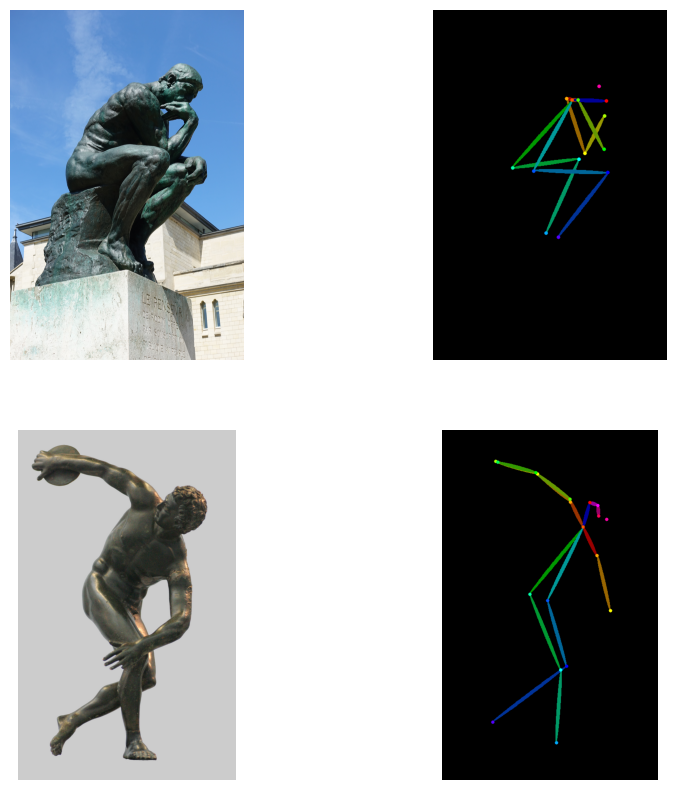

In [5]:
import matplotlib.pyplot as plt

from controlnet_aux import OpenposeDetector
from diffusers.utils import load_image
from diffusers.utils import load_image
from PIL import Image

openpose = OpenposeDetector.from_pretrained("lllyasviel/ControlNet")

image_file1 = "/content/drive/MyDrive/colab_data/controlnet/rodin.jpg"
original_image1 = load_image(image_file1)
openpose_image1 = openpose(original_image1)

image_file2 = "/content/drive/MyDrive/colab_data/controlnet/discobolos.jpg"
original_image2 = load_image(image_file2)
openpose_image2 = openpose(original_image2)


images = [original_image1, openpose_image1, original_image2, openpose_image2]
draw_image_grids(images, 2, 2)


In [6]:
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel
from diffusers import UniPCMultistepScheduler
import torch

controlnet = ControlNetModel.from_pretrained(
    "fusing/stable-diffusion-v1-5-controlnet-openpose", torch_dtype=torch.float16
)
pipe = StableDiffusionControlNetPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    controlnet=controlnet,
    torch_dtype=torch.float16,
)
pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)
pipe.enable_model_cpu_offload()
pipe.enable_xformers_memory_efficient_attention()

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


In [15]:
poses = [openpose_image1, openpose_image2, openpose_image1, openpose_image2]

generator = [torch.Generator(device="cpu").manual_seed(2) for i in range(4)]
prompt1 = "batman character, best quality, extremely detailed"
prompt2 = "ironman character, best quality, extremely detailed"

output = pipe(
    [prompt1, prompt1, prompt2, prompt2],
    poses,
    negative_prompt=["monochrome, lowres, bad anatomy, worst quality, low quality"] * 4,
    generator=generator,
    num_inference_steps=20,
)

  0%|          | 0/20 [00:00<?, ?it/s]

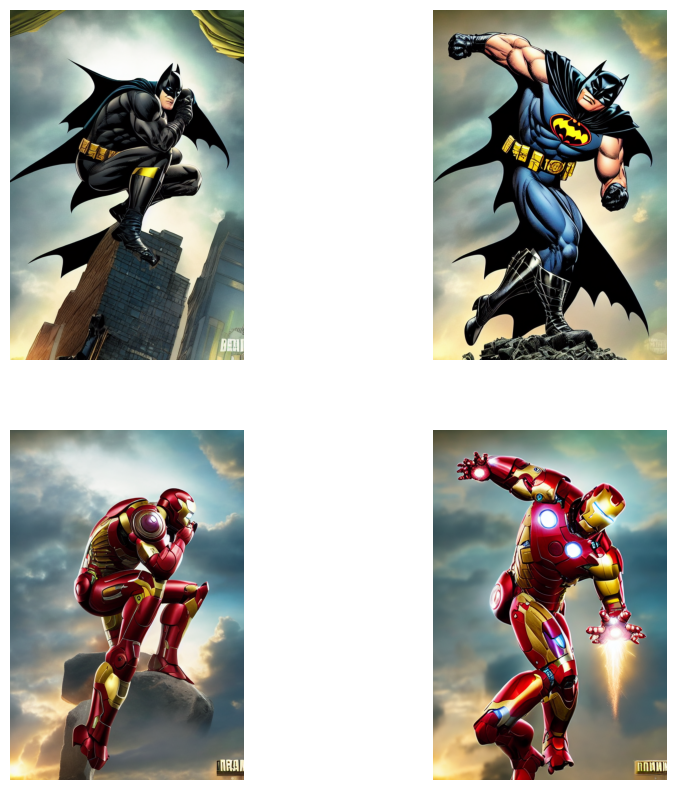

In [16]:
draw_image_grids(output.images, 2, 2)